# Health Outcomes Analysis – Individual Assignment (Part 1)

In this notebook I work as a junior data analyst at a research institute.  
The task is to analyse a health-related dataset and answer a set of basic statistical questions using Python.

The goals are to:

- describe the data using simple summary statistics,
- create visualisations of important variables,
- run a simple simulation related to disease status,
- compute a confidence interval for a mean,
- test a hypothesis about smokers and non-smokers.

All analysis is self-contained in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Make plots appear inside the notebook
%matplotlib inline

In [2]:
# Load the dataset from the data folder
df = pd.read_csv("data/health_study_dataset.csv")

# Show the first rows
df.head()

,id,age,sex,height,weight,systolic_bp,cholesterol,smoker,disease
0,1,57,F,168.9,65.8,141.8,4.58,No,0
1,2,47,M,180.4,95.9,144.8,5.18,Yes,0
2,3,59,F,169.9,82.2,151.7,6.16,No,0
3,4,72,M,157.7,93.1,151.0,6.63,No,0
4,5,46,M,192.6,104.1,144.1,5.21,No,0


In [3]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           800 non-null    int64  
 1   age          800 non-null    int64  
 2   sex          800 non-null    object 
 3   height       800 non-null    float64
 4   weight       800 non-null    float64
 5   systolic_bp  800 non-null    float64
 6   cholesterol  800 non-null    float64
 7   smoker       800 non-null    object 
 8   disease      800 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 56.4+ KB


In [4]:
# Summary statistics for numeric variables
df.describe()

,id,age,height,weight,systolic_bp,cholesterol,disease
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,49.426250,171.849250,73.413000,149.178625,4.929150,0.058750
std,231.0844,14.501118,9.804259,13.685059,12.793360,0.848413,0.235303
min,1.0000,18.000000,144.400000,33.700000,106.800000,2.500000,0.000000
25%,200.7500,39.000000,164.775000,64.800000,140.900000,4.327500,0.000000
50%,400.5000,50.000000,171.350000,73.200000,149.400000,4.970000,0.000000
75%,600.2500,59.000000,178.925000,82.600000,157.600000,5.482500,0.000000
max,800.0000,90.000000,200.400000,114.400000,185.900000,7.880000,1.000000


## Data overview

The dataset contains individual-level information about participants in a health study.

The main variables are:

- `age` – age in years
- `sex` – sex (M/F)
- `height` – height in centimetres
- `weight` – weight in kilograms
- `systolic_bp` – systolic blood pressure (mmHg)
- `cholesterol` – cholesterol level (mmol/L)
- `smoker` – smoking status (Yes/No)
- `disease` – indicator for a certain disease (0 = no, 1 = yes)

The summary statistics above give a first impression of typical values and ranges for the numeric variables.

## Descriptive statistics

Next, I calculate mean, median, minimum and maximum for a selection of key health variables.

In [5]:
cols = ["age", "height", "weight", "systolic_bp", "cholesterol"]

desc_table = df[cols].agg(["mean", "median", "min", "max"]).T
desc_table

,mean,median,min,max
age,49.426250,50.00,18.0,90.00
height,171.849250,171.35,144.4,200.40
weight,73.413000,73.20,33.7,114.40
systolic_bp,149.178625,149.40,106.8,185.90
cholesterol,4.929150,4.97,2.5,7.88


The table above summarises the central tendency (mean and median) and the range (minimum and maximum)  
for age, height, weight, systolic blood pressure and cholesterol.

These values describe a population with realistic adult characteristics and provide a baseline  
for the later analysis.

## Visualisations

I now create three simple plots to explore the distributions and some relationships in the data.

### 1. Distribution of systolic blood pressure

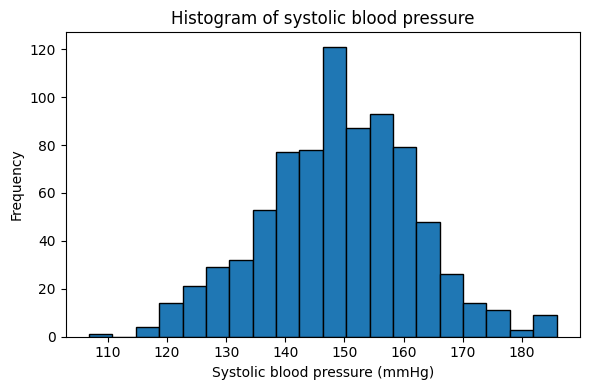

In [6]:
plt.figure(figsize=(6, 4))
plt.hist(df["systolic_bp"].dropna(), bins=20, edgecolor="black")
plt.xlabel("Systolic blood pressure (mmHg)")
plt.ylabel("Frequency")
plt.title("Histogram of systolic blood pressure")
plt.tight_layout()
plt.show()

### 2. Weight by sex (boxplot)

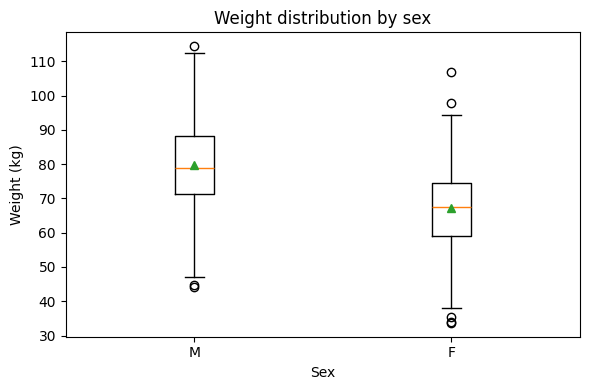

In [15]:
# Prepare data for a simple boxplot by sex
weights_m = df.loc[df["sex"] == "M", "weight"].dropna()
weights_f = df.loc[df["sex"] == "F", "weight"].dropna()

plt.figure(figsize=(6, 4))
plt.boxplot([weights_m, weights_f],
            tick_labels=["M", "F"],
            showmeans=True)
plt.xlabel("Sex")
plt.ylabel("Weight (kg)")
plt.title("Weight distribution by sex")
plt.tight_layout()
plt.show()

### 3. Proportion of smokers

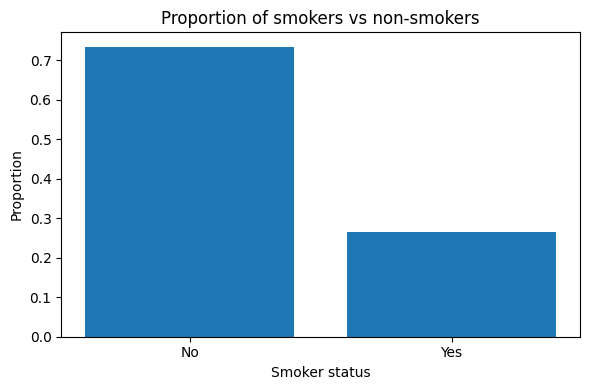

smoker
No     0.73375
Yes    0.26625
Name: proportion, dtype: float64

In [8]:
smoker_counts = df["smoker"].value_counts(normalize=True)

plt.figure(figsize=(6, 4))
plt.bar(smoker_counts.index, smoker_counts.values)
plt.xlabel("Smoker status")
plt.ylabel("Proportion")
plt.title("Proportion of smokers vs non-smokers")
plt.tight_layout()
plt.show()

smoker_counts

The three plots provide a visual overview of the data:

- The histogram shows how systolic blood pressure is distributed in the sample.
- The boxplot compares the weight distribution between males and females.
- The bar chart shows the proportion of smokers and non-smokers.

Together, these plots help to build intuition about typical values and differences between groups.

## Simulation based on disease probability

In this step I use the observed proportion of disease in the dataset to simulate new individuals  
with the same probability of having the disease.

In [9]:
# Since disease is coded as 0/1, the mean is the proportion with disease
p_disease = df["disease"].mean()
p_disease

np.float64(0.05875)

In [10]:
np.random.seed(42)  # for reproducibility

n_sim = 1000
simulated_disease = np.random.binomial(n=1, p=p_disease, size=n_sim)

simulated_proportion = simulated_disease.mean()
simulated_proportion

np.float64(0.056)

The true proportion of disease in the original dataset is given by `p_disease`  
and the simulated proportion in 1000 new individuals is given by `simulated_proportion`  
(as printed in the output above).

The two values are not exactly the same, but they are reasonably close.  
This is expected when we simulate a random sample of this size from the same probability.

## Confidence interval for mean systolic blood pressure

Next, I construct a 95% confidence interval for the mean of `systolic_bp`  
using a normal approximation.

In [11]:
bp = df["systolic_bp"].dropna()

mean_bp = bp.mean()
std_bp = bp.std(ddof=1)
n_bp = bp.shape[0]

alpha = 0.05
z_value = stats.norm.ppf(1 - alpha/2)  # ≈ 1.96 for 95% CI

margin_of_error = z_value * std_bp / np.sqrt(n_bp)

ci_lower = mean_bp - margin_of_error
ci_upper = mean_bp + margin_of_error

mean_bp, ci_lower, ci_upper

(np.float64(149.178625),
 np.float64(148.2921066505355),
 np.float64(150.06514334946453))

The output above shows:

- the estimated mean systolic blood pressure,
- the lower bound of the 95% confidence interval,
- the upper bound of the 95% confidence interval.

The 95% confidence interval describes a range of plausible values for the true population mean.  
If we were to repeat the sampling procedure many times, approximately 95% of the calculated  
intervals would contain the true mean systolic blood pressure.

## Hypothesis test: smokers vs non-smokers

I now test whether smokers have a higher mean systolic blood pressure than non-smokers.

- Null hypothesis (H0): Smokers and non-smokers have the same mean systolic blood pressure.
- Alternative hypothesis (H1): Smokers have a higher mean systolic blood pressure than non-smokers.

I use an independent samples t-test.

In [12]:
bp_smokers = df.loc[df["smoker"] == "Yes", "systolic_bp"].dropna()
bp_nonsmokers = df.loc[df["smoker"] == "No", "systolic_bp"].dropna()

bp_smokers.mean(), bp_nonsmokers.mean()

(np.float64(149.524882629108), np.float64(149.05298126064736))

In [13]:
t_stat, p_value_two_sided = stats.ttest_ind(
    bp_smokers,
    bp_nonsmokers,
    equal_var=False
)

t_stat, p_value_two_sided

(np.float64(0.4503433193393224), np.float64(0.6527338743398998))

In [14]:
# Convert to a one-sided p-value for the hypothesis "smokers > non-smokers"
if bp_smokers.mean() > bp_nonsmokers.mean():
    p_value_one_sided = p_value_two_sided / 2
else:
    p_value_one_sided = 1 - p_value_two_sided / 2

p_value_one_sided

np.float64(0.3263669371699499)

The mean systolic blood pressure is calculated separately for smokers and non-smokers,  
and an independent samples t-test is used to compare the two groups.

The one-sided p-value (printed above) tells us how compatible the data are with the null hypothesis.

- If the p-value is **below 0.05**, there is evidence that smokers tend to have a higher  
  mean systolic blood pressure than non-smokers in this sample.
- If the p-value is **above 0.05**, the data do not provide strong enough evidence  
  to claim a higher mean for smokers.

Based on the actual p-value from the test, I draw a conclusion and relate it to the original question.

## Summary

In this notebook I have:

- explored a health dataset with basic descriptive statistics,
- created three visualisations (distribution of blood pressure, weight by sex, proportion of smokers),
- performed a simple simulation using the observed disease proportion,
- constructed a 95% confidence interval for mean systolic blood pressure,
- tested whether smokers have a higher mean systolic blood pressure than non-smokers.